In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [14]:
# df.describe()
# df.info()

df.oldpeak.unique()

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 3.4, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. ,
       5.6, 0.9, 1.8, 6.2, 4. , 2.5, 0.5, 0.1, 2.1, 2.4, 3.8, 2.3, 1.3,
       3.5])

In [10]:
df.groupby('target').target.count()

target
0    499
1    526
Name: target, dtype: int64

In [19]:

# x_train, x_test, y_train, 
print((x_test))

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
932   51    0   2       140   308    0        0      142      0      1.5   
750   55    1   1       130   262    0        1      155      0      0.0   
522   67    0   2       152   277    0        1      172      0      0.0   
617   41    0   1       126   306    0        1      163      0      0.0   
632   45    0   1       130   234    0        0      175      0      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
810   40    1   0       110   167    0        0      114      1      2.0   
459   51    1   0       140   261    0        0      186      1      0.0   
925   57    1   0       130   131    0        1      115      1      1.2   
688   56    0   0       200   288    1        0      133      1      4.0   
951   62    0   2       130   263    0        1       97      0      1.2   

     slope  ca  thal  
932      2   1     2  
750      2   0     2  
522      2   1    

/Users/priya/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[[171   0]
 [  3 165]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       171
           1       1.00      0.98      0.99       168

    accuracy                           0.99       339
   macro avg       0.99      0.99      0.99       339
weighted avg       0.99      0.99      0.99       339

0.9911504424778761
AUC-ROC score : 0.9910714285714286
AUC-PR score : 0.9954962073324906


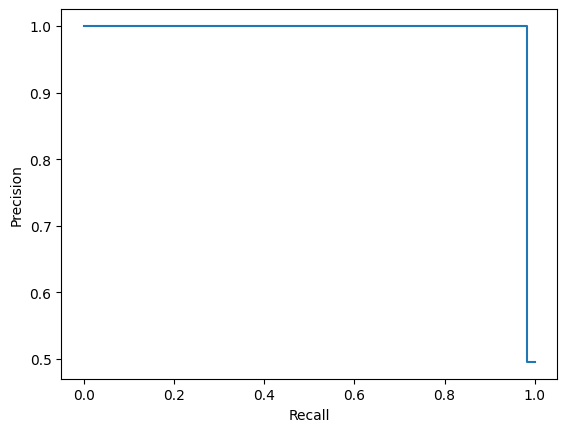

In [48]:
# split x and y
x = df.loc[:,df.columns != 'target']
y = df.loc[:,df.columns == 'target']

# Train test split
from sklearn.model_selection import train_test_split
x1, x_test, y1, y_test = train_test_split(x,y, test_size=0.33, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.33, random_state=42)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test) 

# Baseline model
from sklearn.dummy import DummyClassifier
model_bl = DummyClassifier(strategy='uniform').fit(x_train_s,y_train)
predict_train = model_bl.predict(x_train_s)
predict_test = model_bl.predict(x_test_s)

# Random forest model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier().fit(x_train_s,y_train)
predict_train = model_rf.predict(x_train_s)
predict_test = model_rf.predict(x_test_s)

# model performance
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test,predict_test)
precision, recall, _ = metrics.precision_recall_curve(y_test,predict_test)

print(metrics.confusion_matrix(y_test,predict_test))
print(metrics.classification_report(y_test,predict_test))
print(metrics.accuracy_score(y_test,predict_test))
print(f'AUC-ROC score : {metrics.auc(fpr,tpr)}')
print(f'AUC-PR score : {metrics.auc(recall,precision)}')

metrics.PrecisionRecallDisplay(precision,recall).plot()
metrics.RocCurveDisplay(fpr,tpr).plot()

# Calibration layer
# Calibration plot

In [65]:
y_test_pp

array([[0.01, 0.99],
       [0.11, 0.89],
       [0.99, 0.01],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.03, 0.97],
       [0.89, 0.11],
       [1.  , 0.  ],
       [0.02, 0.98],
       [0.96, 0.04],
       [0.13, 0.87],
       [0.99, 0.01],
       [0.01, 0.99],
       [0.08, 0.92],
       [1.  , 0.  ],
       [0.92, 0.08],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.05, 0.95],
       [1.  , 0.  ],
       [0.62, 0.38],
       [1.  , 0.  ],
       [0.92, 0.08],
       [0.99, 0.01],
       [0.62, 0.38],
       [0.  , 1.  ],
       [0.04, 0.96],
       [0.01, 0.99],
       [0.93, 0.07],
       [0.9 , 0.1 ],
       [0.99, 0.01],
       [0.07, 0.93],
       [0.97, 0.03],
       [0.11, 0.89],
       [0.04, 0.96],
       [0.01, 0.99],
       [0.62, 0.38],
       [0.22, 0.78],
       [0.06, 0.94],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.95, 0.05],
       [0.11, 0.89],
       [0.92, 0.08],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.99, 0.01],
       [0.94,

In [81]:
np.arange(10, 101, 10)

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [111]:
np.array(y_test, np.percentile(y_test,np.arange(10,101,10)))

TypeError: Cannot construct a dtype from an array

In [108]:
# Calibration plot
y_test_pp = model_rf.predict_proba(x_test_s)[:,1]
deciles = np.percentile(y_test_pp,np.arange(10,101,10))
df_prob = pd.DataFrame({'decile':[],'pred_prob':[]})
n=0
for i in deciles:
    pred_data = np.mean([y_test_pp if y_test_pp <= i else np.nan])
    df_prob.append(n+1,pred_data)
    n=n+1

    emp_data = np.mean()
    

# fig, ax = plt.subplots(1,1)
# # ax.plot(predict_prob, emp_prob)
# ax.plot([0,1],[0,1], linestyle='--', color='lightgrey')
# plt.show()
